# TP Apprentissage non supervisé

### Cindy Ponidjem & Lucie Helcmanocki

importation des bibliothèques

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


#from sklearn.metrics import davies_bouldin_score
from sklearn.utils import check_X_y, check_random_state, safe_indexing, deprecated
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import pairwise_distances
np.seterr(divide='ignore', invalid='ignore')
def check_number_of_labels(n_labels, n_samples):
    if not 1 < n_labels < n_samples:
        raise ValueError("Number of labels is %d. Valid values are 2 "
"to n_samples - 1 (inclusive)" % n_labels)

def davies_bouldin_score(X, labels):
    X, labels = check_X_y(X, labels)
    le = LabelEncoder()
    labels = le.fit_transform(labels)
    n_samples, _ = X.shape
    n_labels = len(le.classes_)
    check_number_of_labels(n_labels, n_samples)

    intra_dists = np.zeros(n_labels)
    centroids = np.zeros((n_labels, len(X[0])), dtype=np.float)
    for k in range(n_labels):
        cluster_k = safe_indexing(X, labels == k)
        centroid = cluster_k.mean(axis=0)
        centroids[k] = centroid
        intra_dists[k] = np.average(pairwise_distances(
            cluster_k, [centroid]))

    centroid_distances = pairwise_distances(centroids)

    if np.allclose(intra_dists, 0) or np.allclose(centroid_distances, 0):
        return 0.0

    score = (intra_dists[:, None] + intra_dists) / centroid_distances
    score[score == np.inf] = np.nan
    return np.mean(np.nanmax(score, axis=1))


On cherche à trouver les paramètres eps et min_samples optimaux

### dataset t4.8k

Estimated number of clusters: 6
Estimated number of noise points: 756
Silhouette Coefficient: 0.234
David Bouldin Coefficient: 2.840


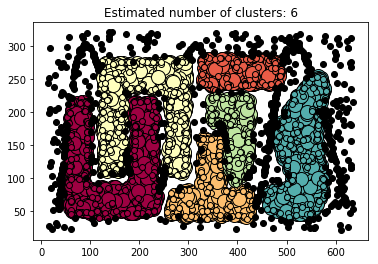

In [15]:
X= np.genfromtxt('./t4.8k.dat', dtype=None, delimiter=' ')

#Compute DBSCAN
db=DBSCAN(eps=8.2,min_samples=15).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# silhouette coefficient and david bouldin
sc48= metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"
      % sc48)

print ("David Bouldin Coefficient: %0.3f"
      %davies_bouldin_score(X, labels))


#Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


### dataset t5.8k

Estimated number of clusters: 6
Estimated number of noise points: 629
Silhouette Coefficient: 0.478
David Bouldin Coefficient: 2.140


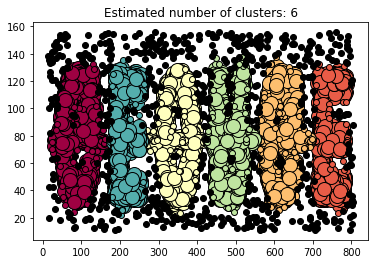

In [16]:
X= np.genfromtxt('./t5.8k.dat', dtype=None, delimiter=' ')

#Compute DBSCAN
db=DBSCAN(eps=8.2,min_samples=13).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)

# silhouette coefficient and david bouldin
sc58= metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"
      % sc58)

print ("David Bouldin Coefficient: %0.3f"
      %davies_bouldin_score(X, labels))

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


### dataset t7.10k

Estimated number of clusters: 9
Estimated number of noise points: 950
Silhouette Coefficient: -0.079
David Bouldin Coefficient: 2.094


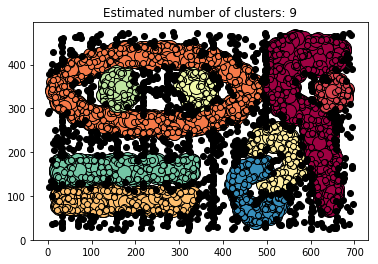

In [17]:
X= np.genfromtxt('./t7.10k.dat', dtype=None, delimiter=' ')

#Compute DBSCAN
#eps et min_samples=bore inférieur pour la taille des classes
db=DBSCAN(eps=8.5,min_samples=12).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# silhouette coefficient and david bouldin
sc71= metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"
      % sc71)

print ("David Bouldin Coefficient: %0.3f"
      %davies_bouldin_score(X, labels))

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


### dataset t8.8k

Estimated number of clusters: 5
Estimated number of noise points: 215
Silhouette Coefficient: -0.007
David Bouldin Coefficient: 1.932


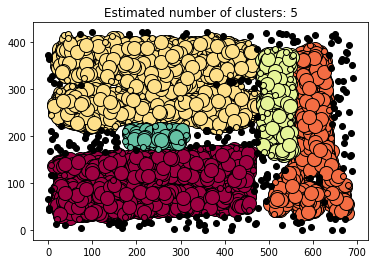

In [18]:
X= np.genfromtxt('./t8.8k.dat', dtype=None, delimiter=' ')

#Compute DBSCAN
#eps et min_samples=bore inférieur pour la taille des classes
db=DBSCAN(eps=12,min_samples=6).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


# silhouette coefficient and david bouldin
sc88= metrics.silhouette_score(X, labels)
print("Silhouette Coefficient: %0.3f"
      % sc88)

print ("David Bouldin Coefficient: %0.3f"
      %davies_bouldin_score(X, labels))

# Plot result
# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


Ci-dessout l'affichage des coeficients de silhouette 

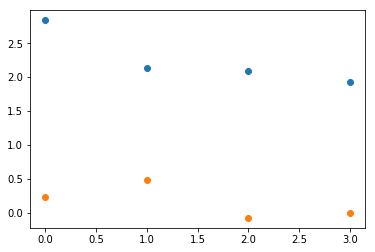

In [34]:
plt.plot([2.840,2.140,2.094,1.932],'o')
plt.plot([0.234,0.478,-0.079,-0.007],'o')

plt.show()